# DSC 305 Lab 2: Wine Reviews

## Objectives

**The purpose of this lab is to help you gain experience exploring and visualizing data.**  In this lab you will:

* Gain experience using **pandas** to interact with data. 
* Practice using a variety of tools 
  * to perform an **exploratory analysis** and 
  * to answer basic questions involving data.
* Gain experience **visualizing data** using tools such as **Matplotlib**.




Gabriel Eze

Porter Kelly

DSC 340 S25

Lab 2: Wine Reviews 

In [1]:
# Import any Python packages that you need here.
# All import statements should be in your first code cell. Example:
import pandas as pd
from math import sin, asin
import matplotlib
import matplotlib.pyplot as plt


**1. Use pandas to import the [Wine Reviews dataset](https://www.kaggle.com/zynicide/wine-reviews) from Kaggle.**

*The zipped file needs to be located on the Kaggle website, downloaded and stored in the same folder as this .ipynb file, and read in.*

In [2]:
f_file = pd.read_csv('winemag-data-130k-v2.csv')

f_file.drop(columns = 'Unnamed: 0', inplace = True)

# f_file.info()

f_file.duplicated().value_counts()

False    119988
True       9983
Name: count, dtype: int64

*I noticed the presence of 2 integer indexes, so I deleted one.*

**2. Note that some fields (columns) have missing data. List, in order, the 3 fields with the most missing data (as a percentage of total data).** 

*.isnull() method is very useful for extracting boolean values for missing data. As a percentage of the total data, the area of the dataframe is needed.*

In [3]:

missing_per_column = f_file.isnull().sum() # Changes the missing values to boolean
total_data = f_file.size # Area of dataframe
missing_percentage = (missing_per_column / total_data) * 100 # Calculate percentages


top_missing = missing_percentage.sort_values(ascending = False).head(3) # Evaluate most missing cells per column

top_missing


region_2                 4.702824
designation              2.217359
taster_twitter_handle    1.847335
dtype: float64

*Sorting in descending order, these were the most columns with missing cells.*

**3. Is *price* missing for any record (row)? What about *points*?**

*View the previous Pandas Series to confirm.*

In [4]:
# Your code for this step goes here. 
missing_percentage[['price', 'points']] # Show output for price & points

price     0.532426
points    0.000000
dtype: float64

*Yes. No.*

**4. List all the values that occur in the country column, along with the number of rows that corresponds to each country. Sort the resulting aggregated dataset in order of decreasing number.**

*To create a frequency table for country, a dictionary is employed which is converted to a dataframe for sorting.*

In [5]:

d_country = {} # Initialize dictionary

for country in f_file['country']: # Loop through country
    if pd.isnull(country):
        key = 'NA'
    else:
        key = country

    if key in d_country: # Update dictionary
        d_country[key] += 1
    else:
        d_country[key] = 1


l_key, l_val = list(d_country), list(d_country.values()) # Store dictionary items for conversion
df_freq = pd.DataFrame({'country':l_key, 'tally':l_val}).sort_values(by = 'tally', ascending = False) # Sort tally
df_freq

,country,tally
2,US,54504
4,France,22093
0,Italy,19540
3,Spain,6645
1,Portugal,5691
7,Chile,4472
6,Argentina,3800
9,Austria,3345
8,Australia,2329
5,Germany,2165


**5. Are any wines associated with province Kentucky in the USA? List the wineries with province Kentucky. Separately, list all the varieties grown in Kentucky.** *(If you cannot locate any wines produced in Kentucky, then choose Idaho for this question instead.)*

*Find all the rowspace with Kentucky as province.*

In [6]:
f_file_ky = f_file[f_file['province'] == 'Kentucky'] # Kentucky data


if len(f_file_ky) >= 1:
    print('Yes')
else:
    print('No')

print('\n')
print(f_file_ky['winery'], '\n')
print(f_file_ky['variety'])

Yes


28589    Elk Creek Vineyards
Name: winery, dtype: object 

28589    Cabernet Franc
Name: variety, dtype: object


*Conclude there's only one type of wine associated with KY along with only one winery.*

**6. Can you identify any other problems involving the data set, such as duplicate entries or irrelevant columns (features)?  Clean the dataset by addressing each issue that you discover.**

*Look for anomalies and redundant elements in the dataset. Pick the best identifiers for a singular bottle of wine*

In [16]:
# Trim the title column, guess a precise region, drop duplicate rows
l_clean_titles, l_clean_region_2, f_file_non_na = [], [], f_file.copy() 

for i in range(len(f_file)): # Initialize loop
    
    s_title = f_file.loc[i, 'title'] 
    l_title = s_title.split() # Array holding content of the title column
    s_region_2 = f_file.loc[i, 'region_2']
    s_region_1 = f_file.loc[i, 'region_1']
    

    # Resolve the issue of redundant 'Other' popping up in both regions
    if not pd.isna(s_region_2) and 'Other' in s_region_2:  # Ensure cell is a string object
        s_region_2 = ' '.join([reg for reg in s_region_2.split() if reg != 'Other']) # Convert back to string type
        
    if not pd.isna(s_region_1) and 'Other' in s_region_1: # Ensure cell is a string object
        s_region_1 = ' '.join([reg for reg in s_region_1.split() if reg != 'Other']) # Convert back to string type    

    
    # If readily available, extract the vintage label from title with assumption it's enclosed
    if '(' in s_title and ')' in s_title:
        i_start, i_end = s_title.find('('), s_title.rfind(')') # Find first and last occurrence
        s_vintage = s_title[i_start + 1 : i_end] # Get vintage
        s_title = s_title[ : i_start].rstrip() # Trim title
         
        if pd.isna(s_region_2):  # Substitute region for vintage label if missing
            s_region_2 = s_vintage
        l_clean_titles.append(s_title)
        
   
    # Irregular cases of vintage recordings
    else:            
        if pd.isna(s_region_1) and pd.isna(s_region_2): # Worst case scenario: reassign NA's
             s_region_2 = 'Unknown'
        elif not pd.isna(s_region_1) and pd.isna(s_region_2): # Mid case scenario: use less precise region
            s_region_2 = s_region_1
            
        l_title = [word for word in l_title if not any(s_reg in word for s_reg in s_region_2.split())] # Delibrately trim title
        
        l_clean_titles.append(' '.join(l_title))
        
 
    l_clean_region_2.append(s_region_2)
    

f_file_non_na['title'] = l_clean_titles
f_file_non_na['region_2'] = l_clean_region_2



sub_col = ['region_2', 'winery', 'designation', 'title', 'variety', 'price'] # Target columns 

# Keep last tasting review with the assumption entries were entered with sort
f_file_clean = f_file_non_na.drop_duplicates(subset = sub_col, keep = 'last') 
f_file_clean = f_file_clean.reset_index()
# print(len(f_file_clean))



119519


*I conclude that the optimal variables for labeling any wine is the sub_col array. I needed at least a precise location column, so I carefully imputed values into region_2 and solved for redundancies. I trimmed the contents of the title column for less repetition. Rather than modifying our original dataset, save progress as new. Henceforth, refer back to the most current dataframe f_file_clean*

**7. Are there any wines that are not exact duplicates, but nevertheless have exactly the same description? If so, is there an apparent explanation for this? For example, maybe it is the same wine?**

*To answer the question begin by grouping the dataframe by description.*

In [8]:

desc_counts = f_file_clean.groupby('description').size() # Count description occurrences


dupl_desc = desc_counts[desc_counts > 1].index # Extract duplicates only


# Extract extra information for context
dupl_wine = f_file_clean[f_file_clean['description'].isin(dupl_desc)].sort_values(by = ['description', 'winery', 'variety'])[['winery', 'variety', 'points', 'description']]
print(dupl_wine.head(20))

                           winery                   variety  points  \
63574          Château Maucaillou  Bordeaux-style Red Blend      91   
63572        Château Pontac-Lynch  Bordeaux-style Red Blend      91   
95484   Château Grand-Puy-Lacoste  Bordeaux-style Red Blend      93   
95489       Château Gruaud Larose  Bordeaux-style Red Blend      93   
65405           Stefano Accordini                 Red Blend      88   
65415           Stefano Accordini                 Red Blend      88   
114577                  Gentilini                    Robola      89   
28951               Hatzimichalis                Chardonnay      88   
48388           Beni di Batasiolo                  Nebbiolo      88   
59034           Beni di Batasiolo                  Nebbiolo      87   
46935          Marchesi di Barolo                  Nebbiolo      86   
103952         Marchesi di Barolo                  Nebbiolo      87   
45772               Cantine Farro                Falanghina      88   
63207 

*Further introduced relevant columns such as winery, grapes used, and points scored. I observed that wines having the same description is mostly due to bottles being scored fairly the same points, made with the same fruit, and in the same winery -- in cases where the latter is false, it is some shareholder winery greatly related by nationality. 
I conclude this is due to the elongated time spent in the winery by the reviewers which caused a repetition of the same description ascribed to wines that were of quality amongst other similar.*

**8. What is the highest price for any wine? How many different wines have that price (there could be ties)? Give the designation of at least one wine with highest price, along with the vineyard and variety.** 

*Create a library of maximum wine prices per wine. Give some other varieties along with contextual information.*

In [9]:
f_file_max_prc = f_file_clean.copy()
f_file_max_prc =  f_file_max_prc.dropna(subset = ['price']) # Ignore cases with no price attached

d_max_prc = f_file_max_prc.groupby('variety')['price'].max().to_dict() # Get max prices for each wine

print(d_max_prc)

for idx, (variety, prc) in enumerate(d_max_prc.items()): # Give several options for each max price per wine
    df_subset = f_file_max_prc[(f_file_max_prc['price'] == prc) & (f_file_max_prc['variety'] != variety)] # Ensure same price but different wine
    print('\n', prc, 'USD', ':', 'There are', str(len(df_subset)), 'other varieties for the', variety, 'Wine at this maximum price.')
    print()
    df_subset = df_subset.dropna(subset = ['designation']) # Show only foolproof results since designation is almost always missing
    
    if not df_subset.empty: # Boolean value on the blankness of a dataframe
        print('\t', 'Here are some other choices:')
        print()
        
        # Randomize seed for a maximum of 10 separate other varieties
        df_sample = df_subset.sample(n = min(10, len(df_subset)), random_state = None) 
        print(df_sample[['designation', 'variety', 'winery']].head(3), '\n') # Show different sparse options to user 



{'Abouriou': 75.0, 'Agiorgitiko': 66.0, 'Aglianico': 180.0, 'Aidani': 27.0, 'Airen': 10.0, 'Albana': 50.0, 'Albanello': 20.0, 'Albariño': 75.0, 'Albarossa': 40.0, 'Aleatico': 55.0, 'Alfrocheiro': 50.0, 'Alicante': 30.0, 'Alicante Bouschet': 150.0, 'Aligoté': 36.0, 'Alsace white blend': 98.0, 'Altesse': 19.0, 'Alvarelhão': 24.0, 'Alvarinho': 75.0, 'Alvarinho-Chardonnay': 15.0, 'Ansonica': 30.0, 'Antão Vaz': 30.0, 'Apple': 33.0, 'Aragonez': 35.0, 'Aragonês': 70.0, 'Argaman': 48.0, 'Arinto': 55.0, 'Arneis': 40.0, 'Asprinio': 15.0, 'Assyrtico': 40.0, 'Assyrtiko': 36.0, 'Athiri': 18.0, 'Austrian Red Blend': 115.0, 'Austrian white blend': 120.0, 'Auxerrois': 32.0, 'Avesso': 30.0, 'Azal': 15.0, 'Babić': 60.0, 'Babosa Negro': 45.0, 'Baco Noir': 36.0, 'Baga': 80.0, 'Baga-Touriga Nacional': 60.0, 'Barbera': 100.0, 'Barbera-Nebbiolo': 30.0, 'Bastardo': 32.0, 'Biancale': 18.0, 'Biancolella': 26.0, 'Bical': 30.0, 'Black Monukka': 25.0, 'Black Muscat': 45.0, 'Blanc du Bois': 40.0, 'Blatina': 12.0, '

*Print the designation (vineyard), along with the grapes utilized, and the winery responsible for production.*

**9. List all countries along with the average price and the average points of all wines associated with that country.  Sort the list by price and (in case there are ties), next by points, and finally alphabetically by country name.** 

*Aggregate on the dataset and compute measures.*

In [10]:
# Compute averages
df_country = f_file_clean.groupby(['country', 'variety']).agg({'price' : 'mean', 
                                                               'points' : 'mean'}).reset_index()

# Sort accordingly
df_country = df_country.sort_values(by = ['price', 'points', 'country'], ascending = [False, False, True])

df_country

,country,variety,price,points
1033,Portugal,Ramisco,495.000000,93.000000
1047,Portugal,Terrantez,236.000000,95.000000
742,Italy,Grenache,230.000000,90.000000
95,Australia,Muscadelle,201.500000,95.000000
1192,Spain,Carignan,182.555556,93.333333
...,...,...,...,...
360,Egypt,Grenache,NaN,84.000000
1004,Portugal,Espadeiro,NaN,84.000000
1144,South Africa,Merlot-Cabernet Franc,NaN,84.000000
334,Croatia,Pinot Gris,NaN,83.000000


*After making sorts respectively, this is the output information. There is exactly 25 occurences where there's only a singular variety of a kind in a particular country with the prices absent. Hence, the occurrence of NAN values.*

**10. List all of the states (province) that occur in the US that occur in the dataset. List the states in alphabetical order. For each state, list the following statistics for points and price: number of rows for that state that have a value (sample size $N$), minimum value, maximum value, mean (average), median, standard deviation.** 



*Filter by US data.*

In [11]:
print(f_file_clean[f_file_clean['country'] == 'US']['province'].drop_duplicates().sort_values()) # US States

# Summary statistics
us_data = f_file_clean[f_file_clean['country'] == 'US'] 

state_stat = us_data.groupby('province').agg(point_sample_size = ('points', 'count'),
                                            min_point = ('points', 'min'),
                                            max_point = ('points', 'max'),
                                            avg_point = ('points', 'mean'),
                                            median_point = ('points', 'median'),
                                            sdv_point = ('points', lambda x: x.std(ddof = 0)), 
                                            price_sample_size = ('price', 'count'),
                                            min_price = ('price', 'min'),
                                            max_price = ('price', 'max'),
                                            avg_price = ('price', 'mean'),
                                            median_price = ('price', 'median'),
                                            sdv_price = ('price', lambda x: x.std(ddof = 0))
                                            ).sort_index()


state_stat



1363               America
4583               Arizona
16              California
4321              Colorado
28840          Connecticut
98723               Hawaii
523                  Idaho
23535             Illinois
14299                 Iowa
24708             Kentucky
5602         Massachusetts
3                 Michigan
2482              Missouri
2495                Nevada
1571            New Jersey
2490            New Mexico
73                New York
11572       North Carolina
5613                  Ohio
2                   Oregon
1135          Pennsylvania
46665         Rhode Island
599                  Texas
18786              Vermont
11                Virginia
36              Washington
10820    Washington-Oregon
Name: province, dtype: object


,point_sample_size,min_point,max_point,avg_point,median_point,sdv_point,price_sample_size,min_price,max_price,avg_price,median_price,sdv_price
province,,,,,,,,,,,,
America,82,80,94,86.280488,86.0,2.380174,82,6.0,75.0,20.365854,17.0,12.169045
Arizona,39,82,88,84.948718,85.0,1.484082,38,11.0,54.0,29.052632,29.0,11.180216
California,33546,80,100,88.620223,89.0,3.308767,33416,4.0,2013.0,39.224413,33.0,30.793073
Colorado,62,80,91,86.032258,86.0,1.950746,62,12.0,100.0,33.774194,30.0,16.925281
Connecticut,3,84,84,84.000000,84.0,0.000000,3,11.0,20.0,15.333333,15.0,3.681787
Hawaii,1,87,87,87.000000,87.0,0.000000,1,28.0,28.0,28.000000,28.0,0.000000
Idaho,179,80,91,86.469274,87.0,2.080209,177,6.0,55.0,20.468927,18.0,9.121304
Illinois,5,83,86,84.400000,84.0,1.019804,5,26.0,40.0,32.400000,32.0,4.454211
Iowa,4,81,84,83.000000,83.5,1.224745,4,13.0,20.0,15.500000,14.5,2.872281


*Here's a Pandas Series sorted in order of US States and a matrix of summary statistics on price and points for each province.*

**11. Use Matplotlib or Seaborn to construct a scatter plot of the price of Argentine wines and the points assigned to each wine in the review.** 



*Using the Matplotlib package, I produce the required scatter plot.*

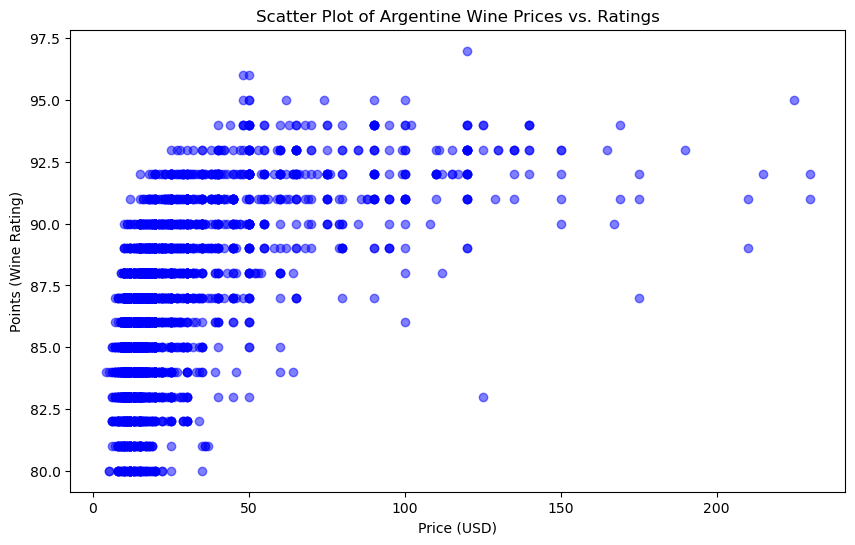

In [12]:
argentina_wines = f_file_clean[f_file_clean["country"] == "Argentina"] # Argentinian data
plt.figure(figsize=(10,6)) # Initiate graph
plt.scatter(argentina_wines["price"], argentina_wines["points"], alpha=0.5, color='blue') # Points against price

# Label the axes and title
plt.xlabel("Price (USD)")
plt.ylabel("Points (Wine Rating)")
plt.title("Scatter Plot of Argentine Wine Prices vs. Ratings")

# Show plot
plt.show()


**12. Construct an effective data visualization showing the relative contribution of the reviewers ("tasters"). The chart should show the individual contribution of the top nine reviewers, with all other reviewers aggregated as Other.**



*Contribution here is determined by a reviewer's total tally, which should highlight effort and time dedicated to tasting wine.*

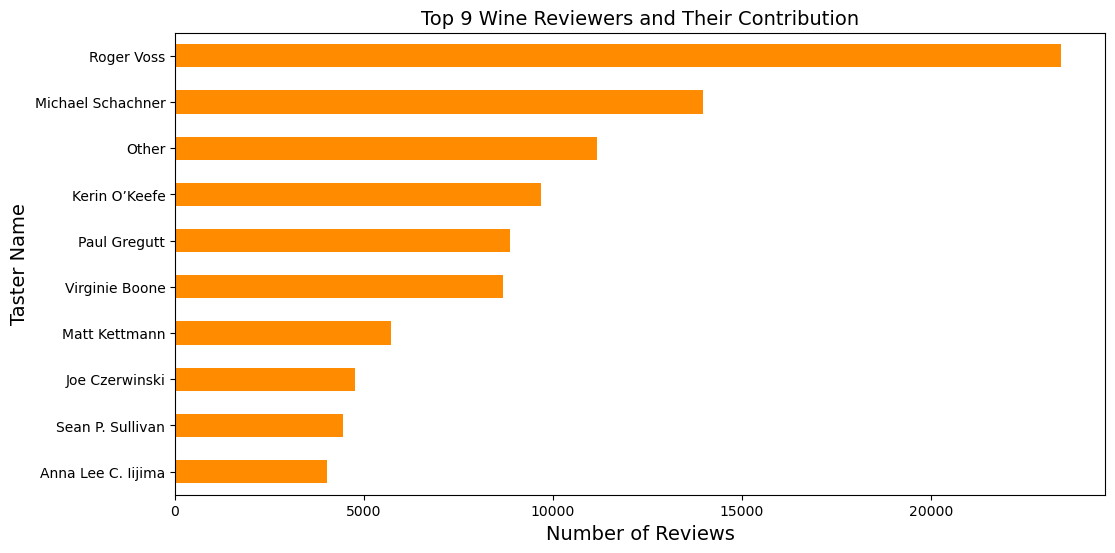

In [13]:
taster_counts = f_file_clean["taster_name"].value_counts() # Unique taster count

# Select the top 9 reviewers
top_reviewers = taster_counts[:9]

# Aggregate all other reviewers into "Other"
other_count = taster_counts[9:].sum()
top_reviewers["Other"] = other_count

# Plot the data using a bar chart
plt.figure(figsize=(12,6)) # Initiate graph
top_reviewers.sort_values().plot(kind="barh", color="darkorange")

# Label the chart
plt.xlabel("Number of Reviews", fontsize=14)
plt.ylabel("Taster Name", fontsize=14)
plt.title("Top 9 Wine Reviewers and Their Contribution", fontsize=14)

# Show the plot
plt.show()


**Discussion. Suppose you wanted to build a predictive model to predict the *variety* and *points* assigned to the wine based only on the words in the *description*. Briefly describe how you would go about this using knowledge that you already have from DSC 205 or other courses.** 

*Given that the only dependent variable here is a categorical one 'description', to predict another categorical variable, 'variety', you could cluster with these two variables using a KNN model to see a potential relationship under the hood. After settling on a particular variety, to predict the points, assign the median point by winery and country of the variety in contigent as a fair way to grade the bottle of wine.*


# References
https://chat.deepseek.com/a/chat/s/a8cd54a3-f383-41dd-bd6c-26365640abad